In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [3]:
X=dataset.iloc[:,:].values #정답없이 전체값
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

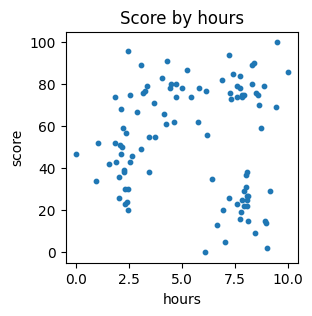

In [4]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1],s=10)#시간값/점수값
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score') #기준차이
plt.show()


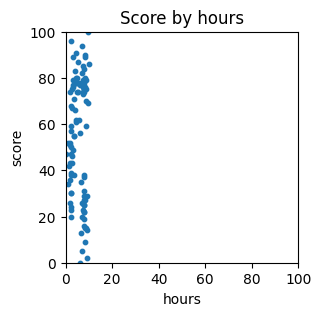

In [5]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1],s=10)#시간값/점수값
plt.ylim(0,100)
plt.xlim(0,100) #동일한 기준으로 비교시 분포
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [6]:
#스케일링-스케일맞추기(값의 격차 조정)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

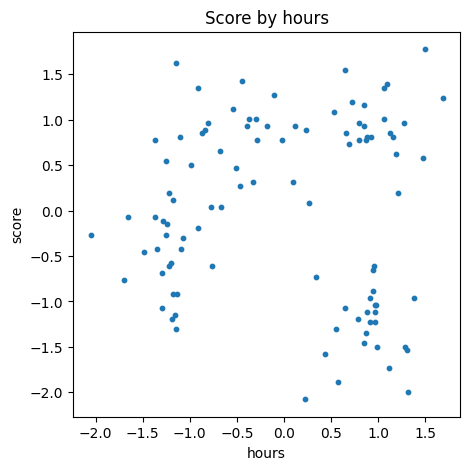

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X_trans[:,0],X_trans[:,1],s=10)#시간값/점수값
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [1]:
#KMeans(앨보우메소드)
from sklearn.cluster import KMeans

inertia_list=[] #inertia-각점~중심점까지 거리 제곱의 합 리스트
for i in range(1, 11, 1): #그룹 1~10개까지 inertia 값 추출
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) #그룹갯수, 모델
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)


NameError: name 'X_trans' is not defined

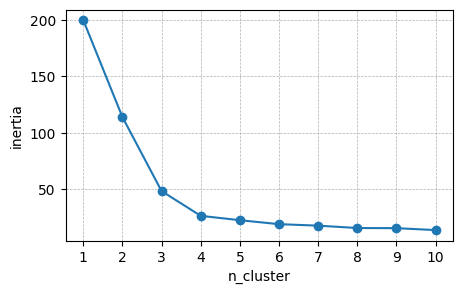

In [ ]:
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5,3))
plt.plot(x,y, marker='o')
plt.xticks([x for x in range(1,11,1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster') #그룹의 갯수
plt.ylabel('inertia')
plt.show()

In [ ]:
K=4 #그룹갯수
#모델생성/학습
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
#예측
y_pred = kmeans.fit_predict(X_trans) #4그룹화
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [ ]:
dataset['cluster'] = y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [ ]:
import numpy as np
index = np.where(y_pred==0) #0값 index만 추출
index

(array([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55,
        56, 57, 67, 78, 85, 90, 92, 95, 97]),)

In [ ]:
X[index, 0],X[index, 1] #X의 0번그룹의 시간만 추출 #X의 0번그룹의 점수만 추출

(array([[3.71, 3.06, 3.33, 5.74, 4.73, 5.  , 4.13, 3.67, 2.86, 4.5 , 5.43,
         4.44, 3.17, 1.83, 2.53, 4.61, 4.04, 4.25, 2.44, 4.71, 4.29, 3.24,
         2.13, 5.8 , 6.21, 5.22]]),
 array([[55., 89., 79., 62., 74., 78., 66., 71., 67., 80., 74., 78., 76.,
         74., 75., 62., 83., 61., 96., 80., 91., 77., 68., 78., 56., 87.]]))

In [ ]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index,0],X[index, 1] )

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

In [ ]:
filt = dataset['cluster']==0 #0값 ds만 추출
dataset[filt].head()

,hour,score,cluster
1,3.71,55,0
3,3.06,89,0
4,3.33,79,0
7,5.74,62,0
9,4.73,74,0


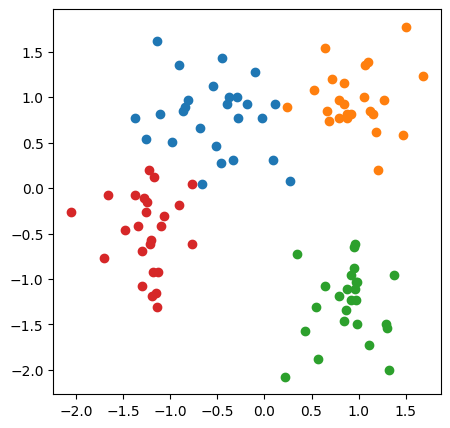

In [ ]:
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x,y)
plt.show()

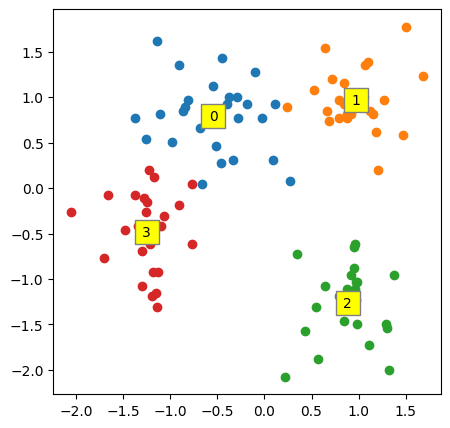

In [ ]:
#그룹별 중심점 추가
centers = kmeans.cluster_centers_
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x,y)
    cx = centers[i,0]
    cy = centers[i,1]
    plt.scatter(cx,cy,c='yellow' ,s=300, ec='gray', marker='s')
    plt.text(cx, cy, i, ha='center', va='center') #backgroundcolor='yellow'
plt.show()

In [ ]:
X_org = scaler.inverse_transform(X_trans) #X_트랜스값 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [ ]:
centers_org = scaler.inverse_transform(centers) #센터스값 원복
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

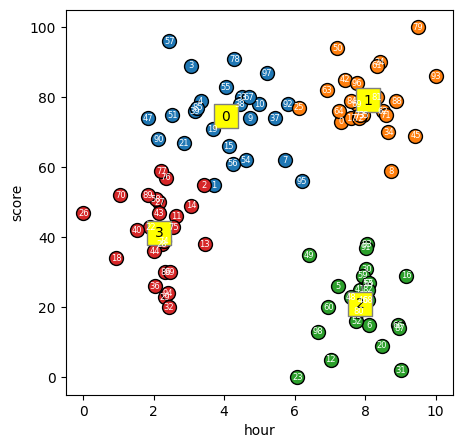

In [ ]:
#원복데이터로
centers = kmeans.cluster_centers_
plt.figure(figsize=(5,5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x,y, ec='black', s=100)
    cx = centers_org[i,0]
    cy = centers_org[i,1]
    plt.scatter(cx,cy,c='yellow' ,s=300, ec='gray', marker='s')
    plt.text(cx, cy, i, ha='center', va='center') #backgroundcolor='yellow'
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=6)
plt.show()

In [ ]:
dataset.loc[57,:]
dataset.loc[31,:]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [ ]:
#KMeans 모델생성 함수
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K,random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X=dataset.iloc[:,[0,1]].values 
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)

    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return kmeans, X, X_trans, centers_org

In [ ]:
# #클러스터 예측 함수
# def predict(K):
#     model, X_trans = model_kmeans(K)
#     y_pred = model.fit_predict(X_trans)
#     return y_pred

In [ ]:
# #클러스터 예측
# y_pred= predict(3)
# y_pred

In [ ]:
kmeans, X_org, X_trans, centers_org = model_kmeans(5)
y_pred = kmeans.fit_predict(X_trans)
y_pred

ImportError: DLL load failed while importing _seq_dataset: 애플리케이션 제어 정책에서 이 파일을 차단했습니다.

In [ ]:
#그래프함수
model, X_org, X_trans, centers_org = model_kmeans(3)
y_pred = model.fit_predict(X_trans)

def graph(K):
    import pandas as pd
    dataset = pd.read_csv('data/KMeansData.csv')
    X=dataset.iloc[:,0:1].values 

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)

    for i in range(K):
        plt.scatter()

    
    # from sklearn.preprocessing import StandardScaler
    # X_org = scaler.inverse_transform(X_trans) #X_트랜스값 다시 원복
    # centers_org = scaler.inverse_transform(centers) #센터스값 원복
    # centers = kmeans.cluster_centers_
    # plt.figure(figsize=(5,5))

    for i in range(K):
        index = np.where(y_pred==i)
        x=X_org[index, 0]
        y=X_org[index, 1]
        plt.scatter(x,y, ec='black', s=100)
        cx = centers_org[i,0]
        cy = centers_org[i,1]
        plt.scatter(cx,cy,c='yellow' ,s=300, ec='gray', marker='s')
        plt.text(cx, cy, i, ha='center', va='center') #backgroundcolor='yellow'
        plt.xlabel('hour')
        plt.ylabel('score')
        
    for idx, x in enumerate(X_org):
        plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=6)
    plt.show()

In [ ]:
graph = graph(K)

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
#다시 깃허브보면서 복습#